# Learning Style Scoring Test Notebook

This notebook is for testing the scoring logic without running the full application.
We'll test various score combinations and visualize the results.

In [4]:
!pip install matplotlib
!pip install seaborn

import sys
sys.path.append('..')  # Add parent directory to path

from logic.scoring import categorize_scores
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load Learning Matrix Data

In [5]:
# Load the learning matrix data
with open('../data/learning_matrix.json', 'r') as f:
    matrix_data = json.load(f)

print("Available styles:", matrix_data['metadata']['styleNames'])
print("Strength levels:", matrix_data['metadata']['strengthLevels'])

Available styles: ['intuitive', 'conceptual', 'pragmatic', 'deductive']
Strength levels: ['strong', 'solid', 'slight']


## 2. Test Function to Get Style Profile

In [6]:
def test_scores(learning_score: float, application_score: float):
    """Test function to get style profile for given scores"""
    categories = categorize_scores(learning_score, application_score)
    style = categories['overall_style']
    strength = categories['learning_strength']
    
    # Get detailed information from matrix
    style_data = matrix_data['styles'][style]
    
    return {
        'scores': {
            'learning_score': learning_score,
            'application_score': application_score
        },
        'categories': categories,
        'description': style_data['strength_levels'][strength]['description'],
        'working_with': style_data['base']['working_with']
    }

## 3. Test Edge Cases

In [7]:
edge_cases = [
    (0, 0, "Zero scores"),
    (25, 25, "High positive scores"),
    (-25, -25, "High negative scores"),
    (5, -5, "Mixed moderate scores"),
    (-5, 5, "Mixed moderate reversed")
]

for learning, application, case_name in edge_cases:
    print(f"\n=== {case_name} ===")
    result = test_scores(learning, application)
    print(f"Learning Score: {learning}")
    print(f"Application Score: {application}")
    print(f"Style: {result['categories']['overall_style']}")
    print(f"Strength: {result['categories']['learning_strength']}")


=== Zero scores ===
Learning Score: 0
Application Score: 0
Style: intuitive
Strength: slight

=== High positive scores ===
Learning Score: 25
Application Score: 25
Style: intuitive
Strength: strong

=== High negative scores ===
Learning Score: -25
Application Score: -25
Style: pragmatic
Strength: strong

=== Mixed moderate scores ===
Learning Score: 5
Application Score: -5
Style: deductive
Strength: slight

=== Mixed moderate reversed ===
Learning Score: -5
Application Score: 5
Style: conceptual
Strength: slight


## 4. Visualize Style Distribution

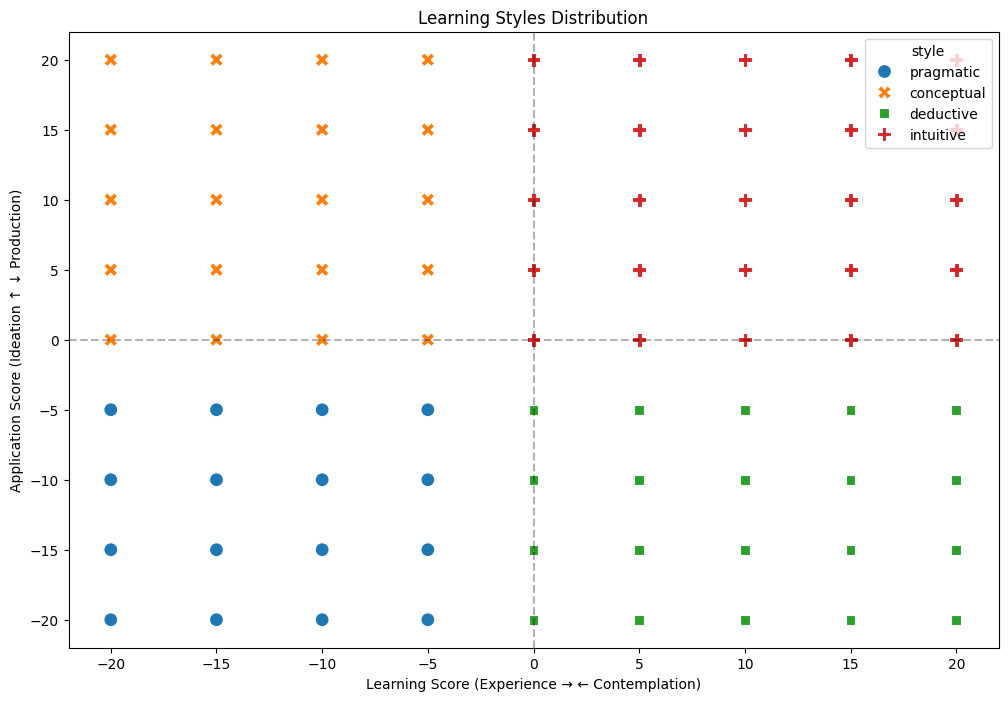

In [8]:
# Generate test points across the score range
scores_to_test = [
    (x, y) 
    for x in range(-20, 21, 5) 
    for y in range(-20, 21, 5)
]

# Get results for each point
results = []
for learning, application in scores_to_test:
    result = test_scores(learning, application)
    results.append({
        'learning_score': learning,
        'application_score': application,
        'style': result['categories']['overall_style']
    })

# Create DataFrame
df = pd.DataFrame(results)

# Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='learning_score',
    y='application_score',
    hue='style',
    style='style',
    s=100
)

# Add center lines
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)

plt.title('Learning Styles Distribution')
plt.xlabel('Learning Score (Experience → ← Contemplation)')
plt.ylabel('Application Score (Ideation ↑ ↓ Production)')
plt.show()

## 5. Test Specific Scenarios

In [9]:
test_scenarios = [
    # Intuitive Style Tests
    (15, 15, "Strong Intuitive"),
    (8, 8, "Moderate Intuitive"),
    (4, 4, "Slight Intuitive"),
    
    # Conceptual Style Tests
    (-15, 15, "Strong Conceptual"),
    (-8, 8, "Moderate Conceptual"),
    (-4, 4, "Slight Conceptual"),
    
    # Pragmatic Style Tests
    (-15, -15, "Strong Pragmatic"),
    (-8, -8, "Moderate Pragmatic"),
    (-4, -4, "Slight Pragmatic"),
    
    # Deductive Style Tests
    (15, -15, "Strong Deductive"),
    (8, -8, "Moderate Deductive"),
    (4, -4, "Slight Deductive")
]

for learning, application, scenario in test_scenarios:
    print(f"\n=== {scenario} ===")
    result = test_scores(learning, application)
    print(f"Style: {result['categories']['overall_style']}")
    print(f"Learning: {result['categories']['learning_direction']} ({result['categories']['learning_strength']})")
    print(f"Application: {result['categories']['application_direction']} ({result['categories']['application_strength']})")
    print("\nDescription:")
    print(result['description'][:200] + "...")


=== Strong Intuitive ===
Style: intuitive
Learning: to Learn Through Experience (solid)
Application: to Apply Knowledge for Ideation (solid)

Description:
An Intuitive Creative is driven by a deep curiosity and thrive on gut feelings and spontaneous bursts of inspiration. They trust their inner compass, often reaching conclusions through leaps of logic ...

=== Moderate Intuitive ===
Style: intuitive
Learning: to Learn Through Experience (slight)
Application: to Apply Knowledge for Ideation (slight)

Description:
An Intuitive Creative is driven by a deep curiosity and thrive on gut feelings and spontaneous bursts of inspiration. They trust their inner compass, often reaching conclusions through leaps of logic ...

=== Slight Intuitive ===
Style: intuitive
Learning: to Learn Through Experience (slight)
Application: to Apply Knowledge for Ideation (slight)

Description:
An Intuitive Creative is driven by a deep curiosity and thrive on gut feelings and spontaneous bursts of inspiration. 

## 6. Strength Level Boundaries Test

In [10]:
boundary_tests = [
    (0, 0, "Boundary - Zero"),
    (1, 1, "Boundary - Minimal Slight"),
    (9, 9, "Boundary - Max Slight"),
    (10, 10, "Boundary - Min Solid"),
    (18, 18, "Boundary - Max Solid"),
    (19, 19, "Boundary - Min Strong")
]

for learning, application, test_name in boundary_tests:
    print(f"\n=== {test_name} ===")
    result = test_scores(learning, application)
    print(f"Scores: ({learning}, {application})")
    print(f"Learning Strength: {result['categories']['learning_strength']}")
    print(f"Application Strength: {result['categories']['application_strength']}")


=== Boundary - Zero ===
Scores: (0, 0)
Learning Strength: slight
Application Strength: slight

=== Boundary - Minimal Slight ===
Scores: (1, 1)
Learning Strength: slight
Application Strength: slight

=== Boundary - Max Slight ===
Scores: (9, 9)
Learning Strength: slight
Application Strength: slight

=== Boundary - Min Solid ===
Scores: (10, 10)
Learning Strength: solid
Application Strength: solid

=== Boundary - Max Solid ===
Scores: (18, 18)
Learning Strength: solid
Application Strength: solid

=== Boundary - Min Strong ===
Scores: (19, 19)
Learning Strength: strong
Application Strength: strong


In [11]:
def test_custom_scores():
    """
    Interactive function to test custom learning and application scores.
    Prompts user for scores and displays a formatted report.
    """
    try:
        # Get user input
        learning_score = float(input("Enter learning score (-35 to 35): "))
        application_score = float(input("Enter application score (-35 to 35): "))
        
        # Validate input ranges
        if abs(learning_score) > 35 or abs(application_score) > 35:
            print("Scores should be between -35 and 35")
            return
            
        # Get the profile using existing test_scores function
        result = test_scores(learning_score, application_score)
        
        # Print formatted report
        print("\n" + "="*50)
        print("LEARNING STYLE PROFILE REPORT")
        print("="*50)
        
        print("\nSCORES:")
        print(f"Learning Score: {learning_score:+.1f}")
        print(f"Application Score: {application_score:+.1f}")
        
        print("\nCATEGORIZATION:")
        print(f"Overall Style: {result['categories']['overall_style'].title()} Creative Style")
        print(f"Learning Direction: {result['categories']['learning_direction']}")
        print(f"Learning Strength: {result['categories']['learning_strength'].title()} Preference")
        print(f"Application Direction: {result['categories']['application_direction']}")
        print(f"Application Strength: {result['categories']['application_strength'].title()} Preference")
        
        print("\nSTYLE DESCRIPTION:")
        print(result['description'])
        
        print("\nWORKING WITH OTHERS:")
        for style, description in result['working_with'].items():
            print(f"\nWorking with {style.title()}:")
            print(description)
            
        print("\n" + "="*50)
        
    except ValueError:
        print("Please enter valid numbers")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

In [12]:
# Example usage:
test_custom_scores()


LEARNING STYLE PROFILE REPORT

SCORES:
Learning Score: +7.0
Application Score: +30.0

CATEGORIZATION:
Overall Style: Intuitive Creative Style
Learning Direction: to Learn Through Experience
Learning Strength: Slight Preference
Application Direction: to Apply Knowledge for Ideation
Application Strength: Strong Preference

STYLE DESCRIPTION:
An Intuitive Creative is driven by a deep curiosity and thrive on gut feelings and spontaneous bursts of inspiration. They trust their inner compass, often reaching conclusions through leaps of logic and embracing unconventional ideas. This style thrives in environments where exploration and experimentation into white spaces is encouraged and rewarded.

WORKING WITH OTHERS:

Working with Intuitives:
While this may be the most comfortable and likely quite fun, diversifying your thought partnership with other types of Creative people will help you all realize and implement the ideas you freely generate. If only with other intuitives, deadlines, visual